# TP : Réseaux Sémantiques

L'objectif de ce TP est de modéliser un réseau sémantique simple en Python en utilisant les bibliothèques `networkx` et `matplotlib`. Ce réseau représente des concepts et les relations qui les lient entre eux.

- **NetworkX** est une bibliothèque Python conçue pour la création, manipulation et analyse de graphes, permettant de modéliser des concepts (nœuds) et leurs relations sémantiques (arêtes) dans un graphe.
- **Matplotlib** est une bibliothèque de visualisation en Python qui s'intègre bien avec NetworkX pour représenter graphiquement les réseaux sémantiques.

Dans cet exemple, nous allons modéliser des relations sémantiques comme "est un" ou "mange" entre différents concepts.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt


## Création du Réseau Sémantique

Nous allons maintenant créer le réseau sémantique en ajoutant les nœuds (concepts) et les arêtes (relations) selon les informations suivantes :

- Le chien est un animal qui mange de la viande.
- La viande est une nourriture.
- Le chat est aussi un animal.
- Un animal est un être vivant et a besoin de respirer.

Les relations seront représentées par des arêtes entre les nœuds, comme "est un" ou "mange".


In [2]:
# Création du graphe
G = nx.DiGraph()

# Ajout des nœuds et des arêtes avec les relations
G.add_edge("chien", "animal", relation="est un")
G.add_edge("chien", "viande", relation="mange")
G.add_edge("viande", "nourriture", relation="est un")
G.add_edge("chat", "animal", relation="est un")
G.add_edge("animal", "être vivant", relation="est un")
G.add_edge("animal", "respirer", relation="besoin de")


## Visualisation du Réseau Sémantique

Nous utilisons Matplotlib pour visualiser le réseau. Les nœuds représentent les concepts, et les arêtes montrent les relations entre ces concepts. Les relations seront affichées en rouge pour plus de lisibilité.


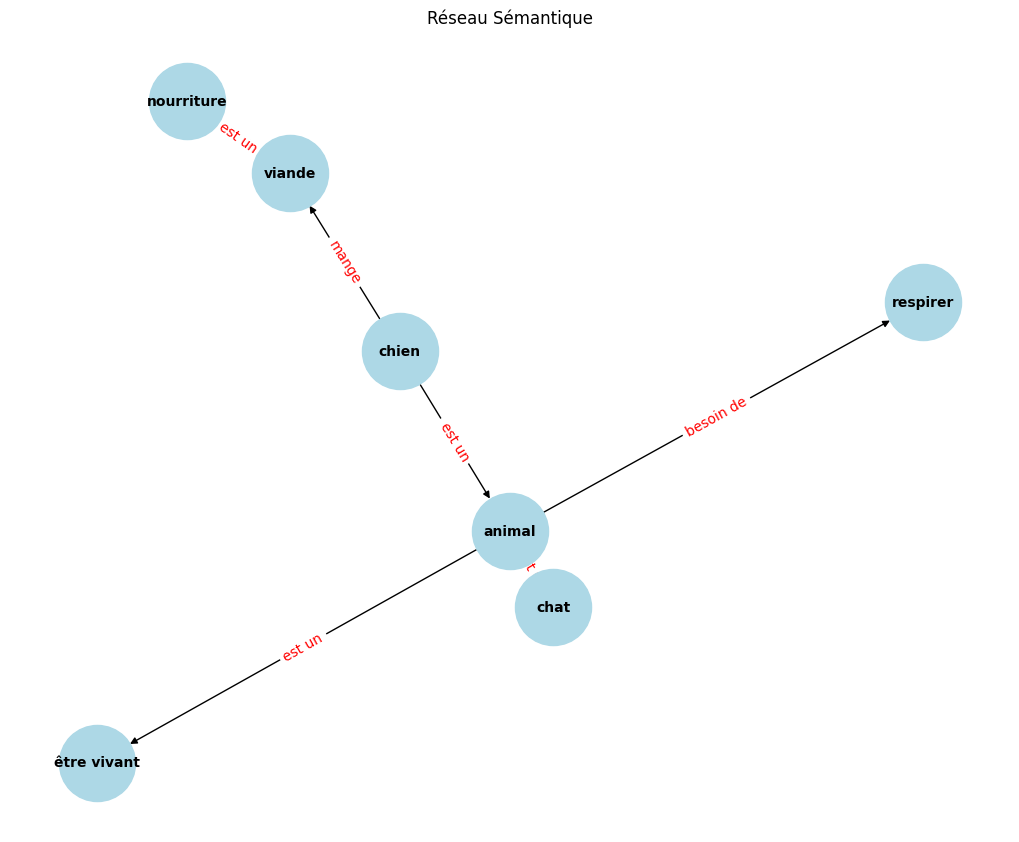

In [3]:
# Visualisation du réseau
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Dessin des nœuds et des arêtes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['relation'] for u, v, d in G.edges(data=True)}, font_color="red")

plt.title("Réseau Sémantique")
plt.show()


## Recherche de Connexions entre Concepts

Nous allons maintenant rechercher :
1. Toutes les connexions associées au concept "chien".
2. La relation spécifique entre "chien" et "animal".


In [4]:
# Recherche des connexions pour le concept "chien"
print("Connexions pour le concept 'chien' :")
for neighbor in G.neighbors("chien"):
    relation = G["chien"][neighbor]["relation"]
    print(f"chien {relation} {neighbor}")

# Recherche de la relation entre "chien" et "animal"
if G.has_edge("chien", "animal"):
    relation = G["chien"]["animal"]["relation"]
    print(f"Relation entre 'chien' et 'animal' : 'chien' {relation} 'animal'")
else:
    print("Aucune relation directe entre 'chien' et 'animal'")


Connexions pour le concept 'chien' :
chien est un animal
chien mange viande
Relation entre 'chien' et 'animal' : 'chien' est un 'animal'


In [5]:
from itertools import permutations

# Liste de toutes les relations possibles entre chaque paire de concepts
print("Relations possibles entre chaque paire de concepts :")
for source, target in permutations(G.nodes, 2):  # Paires de nœuds dans toutes les permutations possibles
    if nx.has_path(G, source, target):  # Vérifie s'il y a un chemin entre les deux nœuds
        path = nx.shortest_path(G, source, target)  # Trouve le chemin le plus court entre les nœuds
        relations = [G[path[i]][path[i+1]]["relation"] for i in range(len(path)-1)]  # Récupère les relations entre chaque paire dans le chemin
        print(f"{source} --> {target} : {' -> '.join(relations)}")


Relations possibles entre chaque paire de concepts :
chien --> animal : est un
chien --> viande : mange
chien --> nourriture : mange -> est un
chien --> être vivant : est un -> est un
chien --> respirer : est un -> besoin de
animal --> être vivant : est un
animal --> respirer : besoin de
viande --> nourriture : est un
chat --> animal : est un
chat --> être vivant : est un -> est un
chat --> respirer : est un -> besoin de
